<a href="https://colab.research.google.com/github/AbakarS/Phishing_FeatureExtraction/blob/main/Features_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sélection des caractéristiques (Features selection)**

La sélection des caractéristiques permet de sélctionner un sous-ensemble de features dans l'ensemble des caractéristiques de la base des données. En revanche l'ingénierie des caracteristiques permet d'extraire un nouvel ensemble de caractéristiques à partir des caracteristiques existantes. Nous parlerons dans ce document que de la sélection des caractéristiques, l'ingénierie des caracteristiques fera l'objet d'un autre document. 

Le plus souvent, Il existe beacoup de caractéristqiues non pertinentes dans un ensemble de données qui ne contiennent pas beaucoup d'informations. Ces caractéristiques, lorsqu'elles ne sont pas traitées, influenent la capacité de généralisation et la performance des algorithmes d'apprentissage automatique. On parle dans ce cas de la **malédiction de la dimensionnalité**. Pour parrer à ce porblème lié à la malédiction de la dimensionnalité, nous devons sélectionner les caractéristiques qui sont les plus importantes ou qui influent le plus sur la variable cible et qui sont pas redondantes. 

Nous avons divisé la sélection de caractéristiques en trois méthodes **filter** , **wrapper** et **embedded**.

## **A. Méthodes de filtrage**

Ces méthodes sélctionnent des caractéristiques sur la base des analyses statistqiues univariées des features. En effet, on calcule un score pour chaque caractéristique et on sélectionne un sous ensemble de caractéristiques en fonction de ce score. 
L'avantage de ces méthodes est qu'elles sont plus rapides et moins coûteuses en calcul que les méthodes **Wrapper** mais l'inconvénient est qu'elles ne performent pas plus que les méthodes de Wrapper.

Dans ce qui suit, nous présentons les méthodes de filtrage les plus couramment utilisées.



**1. Gain d'information**


Le gain d'information calcule la réduction d'entropie à partir de la transformation d'un ensemble de données. Il peut être utilisé pour la sélection de caractéristiques en évaluant le gain d'information de chaque variable dans le contexte de la variable cible. En effet, il s'agit de calculer le gain d'information entre la variable cible et chaque variable d'entrée dans l'ensemble de données d'apprentissage. L'outil **sklearn** fournit le package [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) pour le calcul du gain d'information. 

En termes simples, le [gain d'information](https://ravedata.in/machine-learning/feature-selection-ig/) est la quantité d'entropie (désordre) que nous allons supprimer en connaissant au préalable une caractéristique d'entrée. Mathématiquement, le gain d'information est défini comme suit :

IG(Y/X) = H(Y) – H(Y/X)

Où H(Y) est l'entropie de y et H(Y/X) est l'entropie conditionnel de Y sachant X

Plus le gain d'information est important, plus l'entropie est supprimée et plus la variable X contient d'informations sur Y.




[0.06363894 0.81617579 0.1504464  0.04711776 0.         0.
 0.16012514 0.21579337 0.18858225 0.        ]


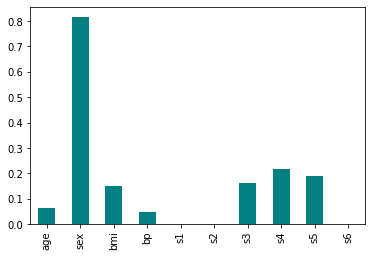

In [ ]:
# Importer les librairies
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import load_diabetes

# Charger l'ensemble des données
df= load_diabetes()
y= df.target
X= df.data

# Implementer le package et tracer le graphique visualisant l'importance de variables 
# par rapport à la variable target
importances=mutual_info_classif(X, y)
print(importances)
feat_importances=pd.Series(importances, df.feature_names[0:len(df.feature_names)])
# bar plot : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
feat_importances.plot(kind='bar', color='teal')
plt.show()

**2. Fisher Score**

Cette [technique supervisée](https://www.sciencedirect.com/science/article/abs/pii/S002002552100832X#:~:text=Extraits%20de%20section-,Mod%C3%A8le%20de%20score%20de%20Fisher,-Le%20score%20de) de sélection de caractéristiques est l'une des méthodes les plus largement utilisées. Elle a pour objectif principal de trouver un sous-ensemble des caracteristiques et de maximiser les distances entre les points de données dans différentes classes tout en minimisant les distances entre les points de données dans la même classe. 

Soit un ensemble de données par rappaort à c classes différentes 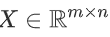, le score de Fisher de la ième caractéristique est calculé par:

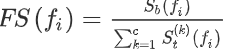

Où 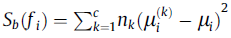est la dispersion entre classes de la ième caractéristique, image.png est le nombre d'échantillons dans la kème classe, image.png est la moyenne de la ième caractéristique dans la kème classe, image.png est la moyenne de la ième caractéristique dans X , 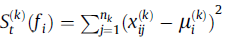 est la
matrice de dispérsion intra-classe de la ième caractéristique par rapport à la k ième classe, et xij(k) désigne la valeur de la ième caractéristique pour le j ième échantillon de la k ième classe.

Bref, l'algorithme de score de Fisher sélectionne chaque caractéristique indépendamment en fonction de leurs scores.

Nous utilisons le module [skfeature-chappers](https://github.com/charliec443/scikit-feature) pour importer le package de score de fisher. 

In [ ]:
# Importer la bibliotheque permettant d'importer le score de fisher 
!pip install skfeature-chappers

     |████████████████████████████████| 66 kB 4.1 MB/s 


[1 7 3 6 2 0 9 8 5 4]


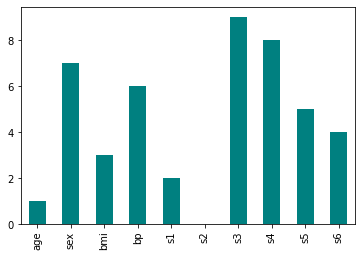

In [ ]:
## import des bibliotheques necessaires 
import pandas as pd
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import load_diabetes

# Charger l'ensemble des données
df= load_diabetes()
y= df.target
X= df.data

# Implementons les packages nécessaires
rank=fisher_score.fisher_score(X, y)
print(rank)
feat_importances=pd.Series(rank, df.feature_names[0:len(df.feature_names)])
feat_importances.plot(kind='bar', color='teal')
plt.show()

**3. Test du chi carré**

Ce [test ](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=to%20normal%20distribution.-,Chi%2DSquare%20Test%20for%20Feature%20Selection,-A%20chi%2Dsquare)est utilisé dans le cadre de sélection des caractéristiques catégorielles. En effet, il suffit de calculer le chi-carré entre chaque feature et la feature target et nous sélectionnons ensuite les caractéristiques avec les meilleurs scores de chi-carré. Ce test exige certaines conditions:

- les variables doivent être catégorielles ;
- échantillonnées indépendamment ;
- et les valeurs doivent avoir une fréquence attendue supérieure à 5.

Étant donné les données de deux variables, nous pouvons obtenir le nombre observé O et le nombre attendu E. Le chi carré mesure comment le nombre attendu E et le nombre observé O s'écartent l'un de l'autre.

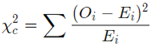

Où 
c: est le degré de liberté
O: valeurs observées
E: valeurs attendues

Lorsque deux caractéristiques sont indépendantes, le nombre observé est proche du nombre attendu, nous aurons donc une valeur Chi-Square plus petite. Une valeur de chi carré si élevée indique que l'hypothèse d'indépendance est incorrecte. En termes simples, plus la valeur Chi-Square est élevée, plus la caractéristique dépend de la réponse et elle peut être sélectionnée pour la formation du modèle.



In [ ]:
# Import des bibliothéques nécessaires 
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Charger les données
X, y= load_iris(return_X_y=True, as_frame=True)

print("Nombre de features initiales :", X.shape)

#Implémenter le packahe de Chi-Square
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print("Nombre de features selectionnées :",X_new.shape)



Nombre de features initiales : (150, 4)
Nombre de features selectionnées : (150, 2)


**4. Coefficient de corrélation**

La [corrélation](http://www.biostat.ulg.ac.be/pages/Site_r/corr_pearson.html) permet de mesurer la relation linéaire entre 2 variables ou plus. Nous utilisons la corrélation pour la sélection de caractéristiques dans la logique que les variables pertinentes sont fortement corrélées avec la variable cible. En plus, il faut verifier que les variables ne sont pas correlées entre elles. En effet, si deux caractéristiques sont corrélées cela veut dire qu'on puisse prédire l'une à partir de l'autre. Par consequent, il est impératif de supprimer l'une de deux variables, car les deux variables n'ajoutent que la même information au modele et ainsi du bruit.
Nous utilisons la corrélation de Pearson qui est definie comme suit:

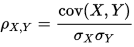




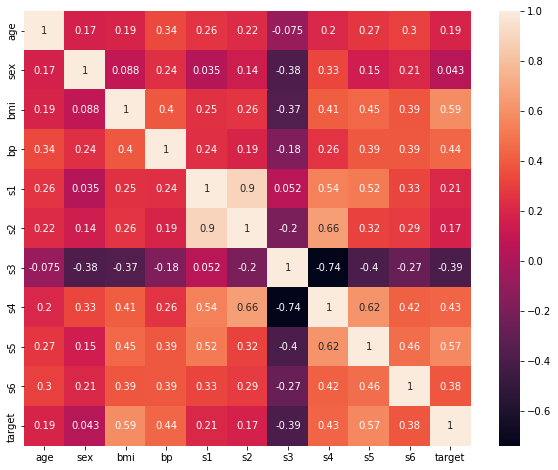

In [ ]:
# Import des bibliothéques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes

#Charger les données
X, y = load_diabetes(return_X_y=True, as_frame=True)
df=pd.concat([X, y], axis=1)
df

# Matrice de corrélation
cor=df.corr()

#heatmap
plt.figure(figsize=(10,8))

sns.heatmap(cor, annot=True)

Une fois que nous avons les résultats de la corrélation, nous devons définir une valeur seuil pour la sélection des caractéristiques, disons 0,5 comme seuil de sélection des variables. En plus si nous constatons que deux variables indépendantes sont corrélées entre elles, alors nous pouvons supprimer dans ce cas la caractéristique qui a une valeur de coefficient de corrélation inferieure avec la vairable target. Bref, nous vérifions la corrélation entre toutes les caractéristiques, pour éviter une multicolinéarité.  

**5. Seuil d'écart (Seuil de variance)**

Cette approche permet de supprimer toutes les features dont la variance n'atteint pas un certain seuil. Ce seuil est initialisé par défaut à zero (0)dans **[Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)**. Il supprime alors toutes les caractéristiques à variance nulle. Cela implique les caractéristiques qui ont la même valeur dans tous les échantillons. Ces dérnieres sont constantes affichant des valeurs similaires/uniques dans toutes les observations du jeu de données. Ces caractéristiques ne fournissent aucune information pertinente permettant aux modeles d'apprentissage automatique de prédire la varible target. Par ailleurs, les caractéristiques avec une variance plus élevée peuvent contenir des informations plus utiles. Cette approche ne prend pas en compte la relation entre les caractéristiques ou les caractéristiques et la variable cible. 

Cette approche ne prend en compte que les caractéristiques (X), pas la variable cible (y), et peut donc être utilisé pour un apprentissage non supervisé.

- Si seuil de variance = 0 (supprimer les caractéristiques constantes)
- Si seuil de variance > 0 (supprimer les caractéristiques quasi-constantes)

Nous utilisans le seuil de variance de **Sklearn** pour supprimer toutes les caractéristiques affichant les mêmes valeurs. 



In [ ]:
# Import des bibliothéques néecessaires
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_diabetes

# Charger les données
X, y = load_diabetes(return_X_y=True, as_frame=True)

#Implementer le package de feature selection
v_threshold=VarianceThreshold(threshold=0)
v_threshold.fit_transform(X)
print(v_threshold.get_feature_names_out())
print()
print(v_threshold.get_params())
print()
print(v_threshold.get_support())


In [ ]:
# Une autre maniére d'appliquer le seuil variance
from sklearn.feature_selection import VarianceThreshold
threshold_n=0
# Implementons le package
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(X)
#Affichons les variables selectionnées
X[X.columns[sel.get_support(indices=True)]] 

- True: indique une faible variance
- False: indique une variance elevée

On constate qu'avec un seuil de zéro (0), nous conservons toutes les caractéristiques. 

## **B.  Méthodes d'emballage (Wrapper Methods) :**

Les méthodes de Wrapper mesurent la pertinence des caractéristiques en fonction des pérformances du classiffier. C'est une approche gourmande qui évalue toutes les combinaisons possibles des caractéristiques par rapport au critère d'évaluation. Ce critère d'évaluation peut être la **p-values**, le **R au carré (R-squared)**, le **R au carré ajusté (Ajusted R-squared** dans un problème de régression. En revanche, dans un problème de classification, ce critère répresente **l'exactitude (accuracy)**, la **précision**, le **recall** et **f1-score**. 
Bref, ces méthodes sélectionnent la combinaison de caractéristiques qui donne les meilleurs resultats pour l'algorithme d'apprentissage automatique spécifié. 

Ces méthodes sont coûteuses en calcul par rapport aux méthodes de filtrage, mais elles surpassent généralement les méthodes de filtrage, car elles sélectionnent les caractéristiques en fonction des pérformances du prédicteur.

Nous presentons ici quelques méthodes de Wrapper


**1. Sélection des caracteristiques pas à pas vers l'avant ([Forward selection](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#:~:text=Done%20in%200.001s-,Selecting%20features%20with%20Sequential%20Feature%20Selection,-%C2%B6))**

Cette méthode de **forward selection** utilise la **régression linéaire** et une **valeur de p** pour la sélection des caractéristiques. La forward selection commence par régresser une caractéristique et si la caractéristique est significative selon la **valeur p**, cette caractéristique est **conservée**. Ce processus est répété en ajoutant une caractéristique à la fois jusqu'à ce que la liste des caractéristiques soit épuisée, et les caractéristiques significatives sont conservées et les caractéristiques non significatives sont supprimées.


In [ ]:
# Import des bibliothéques nécessaires
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

#Charger les données
X, y = load_diabetes(return_X_y=True, as_frame=True)
feature_names = X.columns
reg = LinearRegression()

#Implémenter le package de feature selection
sfs = SequentialFeatureSelector(reg, direction = 'forward', n_features_to_select=4)
sfs.fit(X, y)

print()
print("Affichons les caractéristiques sélctionnées par cette méthode:"
f"{feature_names[sfs.get_support()].tolist()}")



Affichons les caractéristiques sélctionnées par cette méthode:['bmi', 'bp', 's3', 's5']


**2. Élimination des caracteristiques pas à pas vers l'arrière ([back forward](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#:~:text=Done%20in%200.001s-,Selecting%20features%20with%20Sequential%20Feature%20Selection,-%C2%B6))**

Cette téchnique de **back forward** fonctionne dans le sens inverse de la **méthode forward**. Tout d'abord, on commence avec l'ensemble complet des caractéristiques et on élimine les caractéristiques avec des valeurs de **p-value** inférieure au **seuil de signification** choisi (en général, on choisit 5%). Ce processus se poursuit jusqu'à ce que toutes les caractéristiques sélctionnées auront une **p-value** supérieure au **seuil de signification**. 


In [ ]:
# Import des bibliothéques nécessaires 
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

#Charger les données 
X, y = load_diabetes(return_X_y=True, as_frame=True)
feature_names = X.columns
reg = LinearRegression()

#Implementer le package
sfs = SequentialFeatureSelector(reg, direction = 'backward', n_features_to_select=4)
sfs.fit(X, y)

print()
print("Affichons les caractéristiques sélctionnées par cette méthode:"
f"{feature_names[sfs.get_support()].tolist()}")



Affichons les caractéristiques sélctionnées par cette méthode:['bmi', 'bp', 's1', 's5']


**3. Élimination des caracteristiques récursives ([Recursive feature elimination ](https://machinelearningmastery.com/rfe-feature-selection-in-python/))**

Étant donné un estimateur externe qui attribue des poids aux caractéristiques (par exemple, les coefficients d'un modèle linéaire), l'objectif de l'élimination récursive des caractéristiques (RFE) est de rechercher un sous-ensemble de caractéristiques en commençant par toutes les caractéristiques de l'ensemble de données d'apprentissage et en supprimant avec succès les caractéristiques jusqu'à ce qu'il reste le nombre souhaité.
Il faut noter deux points dans RFE : 

- Tout d'abord, l'estimateur est formé sur l'ensemble complet de caractéristiques et l'importance de chaque caractéristique est obtenue soit via un attribut **coef_** soit via un attribut **feature_importances_**.

- Ensuite, les caractéristiques les moins importantes sont supprimées de l'ensemble de caractéristiques. Cette procédure est répétée de manière récursive sur l'ensemble élagué jusqu'à ce que le nombre souhaité de caractéristiques à sélectionner soit finalement atteint. 

In [ ]:
#Import des bibliothéques nécessaires 
from sklearn.feature_selection import RFE
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Charger les données
X, y = load_diabetes(return_X_y=True, as_frame=True)
feature_names = X.columns
estimator = LinearRegression()

#Implémentons le package
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_


print(selector.ranking_)

print()

print("Le nombre optimal de features : %d" % selector.n_features_)
print()


[6 2 1 1 1 1 4 3 1 5]

Le nombre optimal des features : 5



**4. Selction des caracteristiques en fonction de leur importance**

La classe Sklearn **SelectFromModel** permet de réaliser la sélection des caractéristiques selon une valeur d'importance supérieure à une valeur seuil spécifiée dans un classificateur ([par exemple ridge](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#:~:text=S%C3%A9lection%20de%20fonctionnalit%C3%A9s%20en%20fonction%20de%20leur%20importance)). 

Les étapes suivantes montrent comment peut-on utiliser la classe **SelectFromModel :**

- 1. Tout d'abord, déterminer l'importance de la caractéristique à l'aide d'un estimateur tel que la **Régression logistique**, **[RandomForestClassifier](https://vitalflux.com/sklearn-selectfrommodel-feature-importance-python/#:~:text=Sklearn%20SelectFromModel%20pour%20l%27importance%20des%20fonctionnalit%C3%A9s)**, **Ridge**... 

- 2. Créeation d'un estimateur à l'aide de la classe **SelectFromModel** qui prend des paramètres tels que l'estimateur déjà spécifié (**par exemple régression logistique ou RandomClassifier**) ​​et le **seuil**

- 4. Créer le tracé de visualisation représentant les caractéristiques 


**Exemple**

Nous allons utiliser un exemple de **Sklearn** pour mieux éclaircir cette méthdoe de sélection de caractéristiques via leur importance. Nous utilisons l'estimateur **RidgeCVestimateur**. Les caractéristiques dont la valeur absolue de **coef_** la plus **élevée** sont **considérées** comme **les plus importantes**. Il est utile de normaliser les caractéristiques avant d'utilider cette méthode. Les données que nous utiulisons dans cet exemple sont dèjà [normalisées](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#:~:text=the%20features%20were%20already%20standardized). 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

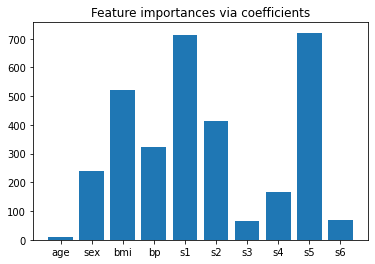


Valeurs des coefficients des caracteristiques : [  9.55141449 239.09035369 520.36336678 323.82862653 712.3282053
 413.38379428  65.81162885 167.51377403 720.94446754  68.12209974]

Le seuil de selection de caracteristiques : 520.3733667838512

Les caracteristiques selectionnées par SelectFromModel: ['s1' 's5']
Fait en 0.002s


In [ ]:
# Import des bibliothéques nécessaires 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_diabetes

# Charger les données
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

# Implémentons le modéle Ridge
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()
print()

print("Valeurs des coefficients des caracteristiques :", importance)

print()

#Implémentons le méthode de feature selection
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

print("Le seuil de selection de caracteristiques :", threshold)

print()

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
print(f"Les caracteristiques selectionnées par SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Fait en {toc - tic:.3f}s")



**5. algorithme génétique**

La méthode d'**algorithme génétique** est une méthode inspirée de la **sélection naturelle** et généralement basée sur un ensemble de fonctions telles que la **mutation**, le **croisement** et la **sélection**. Ces trois phases sont appelées en général des opérateurs génétiques.

Il existe plusieurs variantes de cette méthode, mais en général, les étapes à suivre ressemblent à ceci :

- 1. Tout d'abord, générer une **population** échantillonnée au hasard basée sur des sous-ensemble des caractéristiques possibles ; c'est la **génération 0**.
- 2. Évaluer la valeur de **fitness** de chaque  sous-ensemble des caractéristiques à l'aide d'un modéle prédictif, obtener les scores de validation croisée.
- 3. Générer une nouvelle **génération** avec un sous-ensemble des caractéristiques jugées importantes.
- 4. Répéter les étapes 2 et 3 jusqu'à ce qu'on rencontre un **critère d'arrêt**.

Le critère d'arrêt pourrait être : Un **nombre maximum** de **générations** a été atteint.

Il faut savoir que l'**algorithme génétique** peut également être utilisé pour l'optimisation des **hyperparamètres**.

Bref nous resumons les étapes ci-dessous :

- Tout d'abord, une population initiale est produite.
- Ensuite, un score est attaché aux membres de la population.
- Et un sous-ensemble est sélectionné pour être réproduit avec un tournoi.
- Sélectionner ensuite le matériel génétique à transmettre.
- Appliquer des mutations.
- Répéter sur plusieurs générations.

L'algorithme s'exécute pendant un nombre défini de générations (itérations). Après quoi, le membre optimal de la population sont les caractéristiques sélectionnées.

In [ ]:
# Nous utilisons ce package pour implementer cet algorithme génétique
!pip install sklearn-genetic-opt[all]

     |████████████████████████████████| 160 kB 18.2 MB/s 
     |████████████████████████████████| 16.8 MB 56.0 MB/s 
     |████████████████████████████████| 210 kB 50.8 MB/s 
     |████████████████████████████████| 62 kB 827 kB/s 
     |████████████████████████████████| 146 kB 59.1 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
     |████████████████████████████████| 181 kB 50.9 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.16.6-py3-none-any.whl size=112631 sha256=13695b1549a0c5cbd640268f4d270fe23b1514a3413560aed5e2c268f626104b
  Stored in directory: /root/.cache/pip/wheels/96/c1/f8/d75a22e789ab6a4dff11f18338c3af4360189aa371295cc934
Successfully built databricks-cli
  Attempting uninstall: pyyaml
    Found existing installation

**Exemple de sélection de caractéristiques via l'algorithme génétique**

Pour cet exemple, le jeu de données Iris est utilisé, il s'agit d'un problème de classification avec quatre caractéristiques. Un bruit aléatoire a été simulé pour représenter des caractéristiques non importantes afin de mieux démontrer la sélection des caractéristiques.

Avant de commencer, presentons tout d'abord les packages de l'implementation de l'algorithme. 

**Présentation de Sklearn-genetic-opt**

**Sklearn-genetic-opt** est un package basé sur Python qui utilise des algorithmes évolutifs du package [DEAP](https://deap.readthedocs.io/en/master/) pour choisir l'ensemble d'**hyperparamètres** qui optimise (max ou min) les **scores** de validation croisée ou utiliser pour la sélection des caractéristiques; le package peut être utilisé à la fois pour les problèmes de **régression** et de **classification**. À ce stade, **Sklearn-genetic-opt** est compatible avec n'importe quel **régresseur** ou **classificateur** **scikit-learn**.

**GAFeatureSelectionCV :** 

Cette classe complémentaire du package éffectue la sélection de caractéristiques tout en optimisant les **cv-scores**, tout cela, avec un ensemble **fixe** d'**hyperparamètres**.

In [ ]:
#Import des bibliothéques nécessaires
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

# Charger les données
data = load_iris()
X, y = data["data"], data["target"]

noise = np.random.uniform(0, 10, size=(X.shape[0], 10))

X = np.hstack((X, noise))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

10 caractéristiques bruyantes supplémentaires ont été crées dans notre ensemble d'entraînement et de test.

Création de l'objet de sélection de caractéristiques, l'estimateur que nous allons utiliser est un **Support Vector Machine** (SVM) :

In [ ]:
clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

Ajustons la méthode aux données :

In [ ]:
# Train and select the features
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.508259	0.147145   	0.791444   	0.279857   
1  	60    	0.673292	0.107966   	0.791444   	0.460784   
2  	60    	0.756457	0.0577667  	0.810458   	0.560309   
3  	60    	0.797306	0.0272282  	0.88057    	0.749851   
4  	60    	0.833571	0.0393313  	0.880867   	0.791444   
5  	60    	0.854615	0.0358943  	0.900178   	0.791444   
6  	60    	0.876243	0.022894   	0.900178   	0.810458   
7  	60    	0.88367 	0.00759745 	0.909982   	0.88057    
8  	60    	0.893821	0.0126507  	0.909982   	0.88057    
9  	60    	0.902575	0.00856932 	0.910279   	0.880867   
10 	60    	0.909022	0.0029487  	0.910279   	0.900178   
11 	60    	0.909992	5.3329e-05 	0.910279   	0.909982   
12 	60    	0.910022	0.000100991	0.910279   	0.909982   
13 	60    	0.910051	0.000125654	0.910279   	0.909982   
14 	60    	0.91019 	0.000156266	0.910576   	0.909982   
15 	60    	0.910289	5.3329e-05 	0.910576   	0.910279   
16 	60    	0.911695	0.00713082 	0.950089   	0.91

GAFeatureSelectionCV(estimator=SVC(gamma='auto'), generations=20, keep_top_k=2,
                     n_jobs=-1, population_size=30, return_train_score=True,
                     scoring='accuracy')

Ce **journal**, montre les métriques obtenues à chaque itération (génération), voici ce que signifie chaque entrée :

**gen** : Le numéro de la génération

**nevals** : combien d'hyperparamètres ont été ajustés dans cette génération

**fitness** : mesure du score moyen dans la validation croisée (ensemble de validation). Dans ce cas, la précision moyenne sur les plis de tous les ensembles d'hyperparamètres.

**fitness_std** : écart type de la précision des validations croisées.

**fitness_max** : Le score individuel maximum de tous les modèles de cette génération.

**fitness_min** : Le score individuel minimum de tous les modèles de cette génération.

Après avoir ajusté le modèle, nous utiliserons les methodes suivantes pour voir si notre modéle à performer après suppression de quelques caractéristiques. Cette méthode génétique utilise par défaut le meilleur ensemble de caractéristiques qu'il a trouvé. 

In [ ]:
# Stackage de sous-ensemble de caracteristiques sélectionnées
features = evolved_estimator.best_features_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test[:, features])
accuracy = accuracy_score(y_test, y_predict_ga)
accuracy

0.96

In [ ]:
print(evolved_estimator.best_features_)
print("accuracy_score:", "{:.2f}".format(accuracy))

[False False  True  True False False False False False False False False
 False False]
accuracy_score: 0.96


Dans ce cas, nous avons obtenu un score de précision dans l'ensemble de test de 0,98.

Notez que le **best_features_** est un vecteur de valeurs booléennes, chaque position représente l'index de la caractéristique (colonne) et la valeur indique si cette caractéristique a été sélectionnée (**True**) ou non (**False**) par l'algorithme. Dans cet exemple, l'algorithme a rejeté toutes les variables aléatoires bruitées que nous avons créées et a sélectionné les variables d'origine.

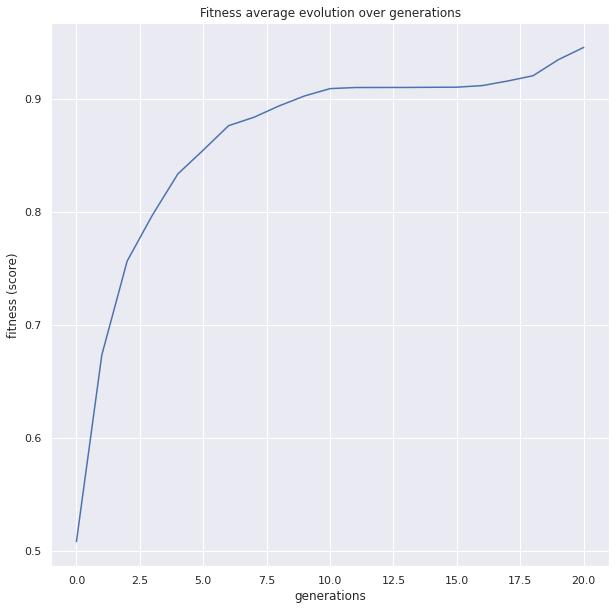

In [ ]:
#Nous pouvons également tracer l'évolution de la condition physique :

from sklearn_genetic.plots import plot_fitness_evolution
plot_fitness_evolution(evolved_estimator)
plt.show()

## **C.  Méthodes intégrées (Embedded Methods):**

Ces méthodes englobent les avantages des méthodes de Wrapper et de filtrage, en incluant les interactions des caractéristiques, mais également en maintenant un coût de calcul raisonnable. Les méthodes intégrées sont itératives en ce sens qu'elles prennent en charge chaque itération du processus de formation du modèle et extraient soigneusement les caractéristiques qui contribuent le plus.

**1. Régularisation LASSO (L1)**

Cette méthode de régularisation consiste à ajouter une pénalité aux différents paramètres (coefficients) du classificateur pour contracter la valeur des coefficients, c'est-à-dire éviter le sur-ajustement. Dans la régularisation du modèle linéaire, la pénalité est appliquée sur les coefficients qui multiplient chacun des prédicteurs. Parmi les différents types de régularisation, Lasso ou L1 a la propriété de réduire certains coefficients à zéro. Par conséquent, cette caractéristique correspondante peut être supprimée du modèle.



In [ ]:
#Import des bibliothéques nécessaires
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

from sklearn.datasets import load_diabetes

# Charger les données
diabetes = load_diabetes()
X, y = load_diabetes(return_X_y=True, as_frame=True)
feature_names = X.columns

reg=LinearRegression()
#lasso=LassoCV()

#Implémenter la selection des caractéristiques
selector = SelectFromModel(reg)
selector.fit(X,y)
selector.estimator_.coef_

print(selector.threshold_)
print()

print(selector.get_support())
print()

print(selector.transform(X))

print()
print("Les caractéristiques sélectionnées:"
f"{feature_names[selector.get_support()].tolist()}")

346.00049551466384

[False False  True False  True  True False False  True False]

[[ 0.06169621 -0.0442235  -0.03482076  0.01990842]
 [-0.05147406 -0.00844872 -0.01916334 -0.06832974]
 [ 0.04445121 -0.04559945 -0.03419447  0.00286377]
 ...
 [-0.01590626 -0.03734373 -0.01383982 -0.04687948]
 [ 0.03906215  0.01631843  0.01528299  0.04452837]
 [-0.0730303   0.08374012  0.02780893 -0.00421986]]

Les caractéristiques sélectionnées:['bmi', 's1', 's2', 's5']


**2. La forêt aléatoire (RandomForest)**

Cet algorithme de Random Forests est un **algorithme de Bagging** (bootstrap aggregating) qui agrège un nombre spécifié d'arbres de décision. Les stratégies arborescentes utilisées par les forêts aléatoires se classent naturellement en fonction de leur degré d'amélioration de la pureté du nœud, ou en d'autres termes d'une diminution de l'impureté (**impureté Gini**) sur tous les arbres. Les nœuds avec la plus grande diminution d'impureté se produisent au début des arbres, tandis que les nœuds avec la moindre diminution d'impureté se produisent à la fin des arbres. Ainsi, en élaguant les arbres sous un nœud particulier, nous pouvons créer un sous-ensemble des caractéristiques les plus importantes.

L'exemple ci-dessous existe [ici](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [ ]:
# Import des bibliothéques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes

# Charger les données
diabetes = load_diabetes()
X, y = load_diabetes(return_X_y=True, as_frame=True)

#Implémentons le modéle RandomForedt
model=RandomForestClassifier()

#Ajustons le modéle
model.fit(X,y)

#Les features selon leur importance
features_importance=model.feature_importances_

features_importance


array([0.11006729, 0.02620044, 0.11821212, 0.11233622, 0.11390063,
       0.11340304, 0.1094928 , 0.06170483, 0.11952304, 0.11515959])

In [ ]:
# Une liste connent les noms de colonnes
feat_labels = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# Affichons les colonnes avec leur valeur d'importance dans RandomForest
for feature in zip(feat_labels, model.feature_importances_):
    print(feature)

('age', 0.11390147778669958)
('sex', 0.026617064797316566)
('bmi', 0.12430234988703696)
('bp', 0.10973664655928968)
('s1', 0.1094691657947845)
('s2', 0.11497183750772381)
('s3', 0.10581848892703724)
('s4', 0.06117764073895424)
('s5', 0.12279132956405968)
('s6', 0.1112139984370976)


In [ ]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Temps écoulé pour calculer les importances: {elapsed_time:.3f} seconds")

Temps écoulé pour calculer les importances: 0.021 seconds


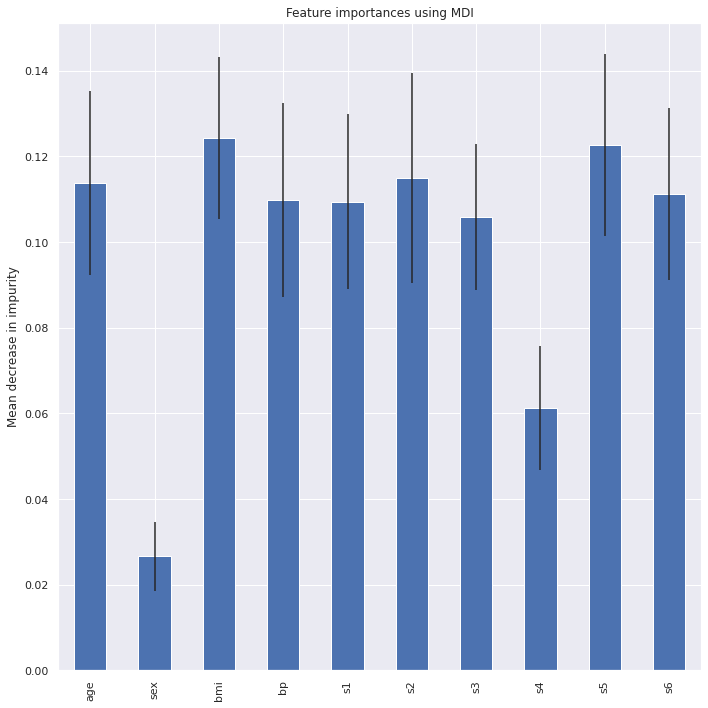

In [ ]:
# Affichopns les features selon leur importance
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# On va utiliser S electFromModel avec un seuil de 0.109 pour la selction de caractéristiques via RandomForest
sfm = SelectFromModel(model, threshold=0.109)

# Ajustement 
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.109)

In [ ]:
# Affichons les caractéristiques importantes 
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index]) 

age
bmi
bp
s1
s2
s3
s5
s6


## **Conclusion**

Nous vennons de voir certaines méthodes de séléction des caracteristiques ou du moins les plus importantes selon les recherches que nous avons pu faire. Les méthodes integrées sont le plus conseillées car elles combinent les avantages de méthodes de filtrage et de Wrapper. Il existe plusieurs d'autres méthodes que nous avons pas cités ici. Du coup vous pourriez faire votre propre recherche pour compléter les méthodes que nous avons présenter ici. Il est crucial de connaitre ces téchniques de sélection de caractéristiques, car elles permettent de réduire la variance et ainsi le surajustemnt et permettent également de réduire le coût de calcul, ce qui réduira le temps de formation du modéle.  

Nous avons juste regrouper les méthodes pour une future utilisation, nous avons rien inventé. Tout est dans les références. J'ai opté pour une présentation en français car la plus part de recherches ou d'articles sont rédigés enb anglais. Du coup, je me suis dit pourquoi une présentation en français. 

J'espere que cela pourrait servir certains. 

#### **References**



1. [Feature Selection Techniques in Machine Learning](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)


3. [Sélection des fonctionnalités et ingénierie des fonctionnalités](https://www.sciencedirect.com/science/article/pii/S1568494620302039?casa_token=s_9NH3dSfjYAAAAA:T14JmdtufUrWqbLu_H-v8MRSUl7ByJYuvUxS_xDPfPKGoj5R5Qc_QCCqAxLxN4tIpiR7CQVkgg)


4. [Sélection de fonctionnalités à l'aide d'un algorithme génétique en Python](https://radhajayaraman11.medium.com/feature-selection-using-genetic-algorithm-2f915d1349b0)

5. [Feature Selection with Genetic Algorithms](https://towardsdatascience.com/feature-selection-with-genetic-algorithms-7dd7e02dd237)

6. [Comment utiliser Sklearn-genetic-opt](https://sklearn-genetic-opt.readthedocs.io/en/stable/tutorials/basic_usage.html)

7. [texte du lien](https://towardsdatascience.com/hyperparameters-tuning-from-grid-search-to-optimization-a09853e4e9b8#:~:text=4.%20Approche%20des%20algorithmes%20g%C3%A9n%C3%A9tiques%20(GA))

8. [Github 1 sklearn-genetic](https://github.com/rodrigo-arenas/Sklearn-genetic-opt)

9. [Github 2 sklearn-genetic](https://github.com/manuel-calzolari/sklearn-genetic)

